In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("D:\survey\Housing.csv")

In [2]:
X = df.drop(['price'], axis = 1, inplace = False)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
y = df.drop( [ "area" , "bedrooms" ,"bathrooms" , "stories" , "mainroad" , "guestroom" , "basement" , "hotwaterheating" , "airconditioning" , "parking" , "prefarea" , "furnishingstatus"], axis = 1 , inplace = False)
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
X['mainroad_n'] = le.fit_transform(X['mainroad'])
X['guestroom_n'] = le.fit_transform(X['guestroom'])
X['basement_n'] = le.fit_transform(X['basement'])
X['hotwaterheating_n'] = le.fit_transform(X['hotwaterheating'])
X['prefarea_n'] = le.fit_transform(X['prefarea'])
X['furnishinstatus_n'] = le.fit_transform(X['furnishingstatus'])
X = X.drop(['mainroad', 'guestroom' , 'basement' , 'hotwaterheating' , 'airconditioning' , 'prefarea' , 'furnishingstatus' ] , axis = 'columns')
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,prefarea_n,furnishinstatus_n
0,7420,4,2,3,2,1,0,0,0,1,0
1,8960,4,4,4,3,1,0,0,0,0,0
2,9960,3,2,2,2,1,0,1,0,1,1
3,7500,4,2,2,3,1,0,1,0,1,0
4,7420,4,1,2,2,1,1,1,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 0 )

In [7]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,prefarea_n,furnishinstatus_n
542,3620,2,1,1,0,1,0,0,0,0,2
496,4000,2,1,1,0,1,0,0,0,0,2
484,3040,2,1,1,0,0,0,0,0,0,2
507,3600,2,1,1,0,1,0,0,0,0,2
252,9860,3,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,0,1,0,1,0,1,1
277,10360,2,1,1,1,1,0,0,0,1,1
9,5750,3,2,4,1,1,1,0,0,1,2
359,3600,3,1,1,1,1,0,0,0,0,2


In [8]:
y_train

,price
542,1750000
496,2695000
484,2870000
507,2590000
252,4515000
...,...
70,6790000
277,4305000
9,9800000
359,3710000


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit( X_train , y_train)

LinearRegression()

In [10]:
X_test

,area,bedrooms,bathrooms,stories,parking,mainroad_n,guestroom_n,basement_n,hotwaterheating_n,prefarea_n,furnishinstatus_n
239,4000,3,1,2,1,1,0,0,0,0,0
113,9620,3,1,1,2,1,0,1,0,1,0
325,3460,4,1,2,0,1,0,0,0,0,1
66,13200,2,1,1,1,1,0,1,1,0,0
479,3660,4,1,2,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
76,6420,3,2,3,0,1,0,0,0,1,0
132,5200,3,1,3,0,1,0,0,0,0,1
311,6060,2,1,1,1,1,0,1,0,0,1
464,4500,2,1,2,1,1,0,0,1,0,1


In [11]:
y_test

,price
239,4585000
113,6083000
325,4007500
66,6930000
479,2940000
...,...
76,6650000
132,5810000
311,4123000
464,3080000


In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 4306319.21325785],
       [ 6730247.68025497],
       [ 3733221.66116485],
       [ 7518482.88619009],
       [ 3111103.33017433],
       [ 6698040.31963148],
       [ 3386512.38825145],
       [ 3480964.84152114],
       [ 3589614.32955226],
       [ 8240558.81242602],
       [ 6275587.7462039 ],
       [ 4034139.06508524],
       [ 4012835.05061   ],
       [ 4913441.7096443 ],
       [ 4186415.75293911],
       [ 2083522.30941164],
       [ 4283723.2615341 ],
       [ 3775452.57710787],
       [ 3533654.82414145],
       [ 4027958.49186373],
       [ 6244826.22028735],
       [ 6341577.60850688],
       [ 4029514.37718222],
       [ 2799827.9992257 ],
       [ 5792781.20719964],
       [ 5131652.68408625],
       [ 5692506.45189209],
       [ 4890016.46172027],
       [ 6049740.82037026],
       [ 5305197.87400953],
       [ 3440654.14909251],
       [ 5374909.88386829],
       [ 6739146.98675135],
       [ 3040848.27084965],
       [ 4414102.38979111],
       [ 4538268.111

In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.6196547078470189


In [14]:
X_test = [[5000,4,2,2,2,1,0,0,1,0,0]]
y_pred = regressor.predict(X_test)
print(y_pred)

[[6902312.76831308]]


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


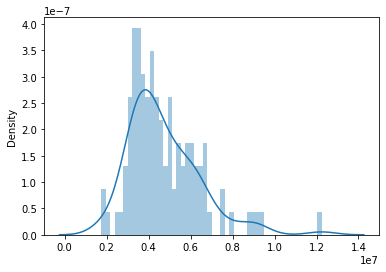

In [16]:
sns.distplot((y_test),bins=50);